In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [ ]:
machine_dataset=pd.read_csv('/content/machine_failure.csv')


In [ ]:
machine_dataset.head()

,UDI,Product ID,Type,Air_temperature_k,Process_temperature_k,Rotational_speed_rpm,Torque_Nm,Tool_wear_min,Machine_failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [ ]:
machine_dataset.shape

(10000, 14)

In [ ]:
machine_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   UDI                    10000 non-null  int64  
 1   Product ID             10000 non-null  object 
 2   Type                   10000 non-null  object 
 3   Air_temperature_k      10000 non-null  float64
 4   Process_temperature_k  10000 non-null  float64
 5   Rotational_speed_rpm   10000 non-null  int64  
 6   Torque_Nm              10000 non-null  float64
 7   Tool_wear_min          10000 non-null  int64  
 8   Machine_failure        10000 non-null  int64  
 9   TWF                    10000 non-null  int64  
 10  HDF                    10000 non-null  int64  
 11  PWF                    10000 non-null  int64  
 12  OSF                    10000 non-null  int64  
 13  RNF                    10000 non-null  int64  
dtypes: float64(3), int64(9), object(2)
memory usage: 1.1+ M

In [ ]:
machine_dataset.isnull().sum()


UDI                      0
Product ID               0
Type                     0
Air_temperature_k        0
Process_temperature_k    0
Rotational_speed_rpm     0
Torque_Nm                0
Tool_wear_min            0
Machine_failure          0
TWF                      0
HDF                      0
PWF                      0
OSF                      0
RNF                      0
dtype: int64

In [ ]:
X = machine_dataset.drop(['Product ID', 'Type' , 'UDI', 'Machine_failure'], axis=1)
Y = machine_dataset['Machine_failure']

In [ ]:
print(X)

      Air_temperature_k  Process_temperature_k  Rotational_speed_rpm  \
0                 298.1                  308.6                  1551   
1                 298.2                  308.7                  1408   
2                 298.1                  308.5                  1498   
3                 298.2                  308.6                  1433   
4                 298.2                  308.7                  1408   
...                 ...                    ...                   ...   
9995              298.8                  308.4                  1604   
9996              298.9                  308.4                  1632   
9997              299.0                  308.6                  1645   
9998              299.0                  308.7                  1408   
9999              299.0                  308.7                  1500   

      Torque_Nm  Tool_wear_min  TWF  HDF  PWF  OSF  RNF  
0          42.8              0    0    0    0    0    0  
1          46.3    

In [ ]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: Machine_failure, Length: 10000, dtype: int64


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=2)

In [ ]:
lin_reg_model=LinearRegression()

In [ ]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

In [ ]:
training_data_prediction = lin_reg_model.predict(X_train)

In [ ]:
error_score=metrics.r2_score(Y_train, training_data_prediction)

In [ ]:
print(error_score)

0.9122462284457453


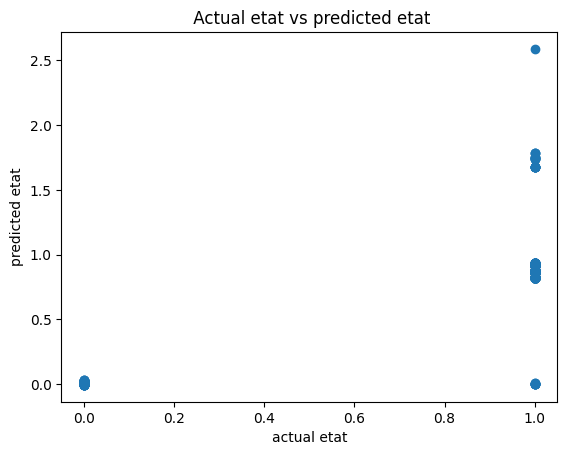

In [ ]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("actual etat")
plt.ylabel("predicted etat")
plt.title(" Actual etat vs predicted etat")
plt.show()

In [ ]:
import pickle

In [ ]:
pickle.dump(lin_reg_model,open('linearRegressionModel.pkl','wb'))

LinearRegression()

In [ ]:
lin_reg_model.predict(pd.DataFrame([[280.1, 370.6, 1000, 50, 6, 0, 0, 0, 0, 0]], columns=['Air_temperature_k', 'Process_temperature_k', 'Rotational_speed_rpm', 'Torque_Nm', 'Tool_wear_min', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']))

array([0.00586286])